## Import Required Modules 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from ipywidgets import FloatProgress

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, chi2, f_classif, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, confusion_matrix

In [4]:
## mute warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Datasets 

In [5]:
# Read training and testing dataset 
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive Project/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predictive Project/test.csv')

In [6]:
# Preview of training dataset 
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
# Print number of rows and columns of training dataset 
df_train.shape

(200000, 202)

In [ ]:
# Preview of testing dataset 
df_test.head()

# testing dataset do not have target variable, so we need to use part of traing dataset as validation dataset 

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
# Print number of rows and columns of testing dataset 
df_test.shape

(200000, 201)

## Data Processing 

In [ ]:
# Checking missing values on training dataset 
df_train.isnull().any().any()

False

In [ ]:
# Checking missing values on testing dataset 
df_test.isnull().any().any()

False

In [ ]:
# No missing values 

In [ ]:
# Class Distribution of Targt variable 

df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

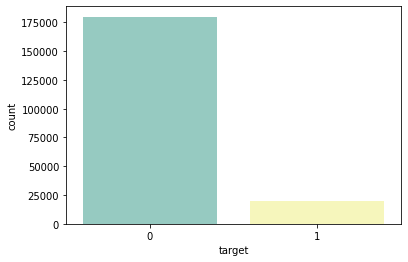

In [ ]:
sns.countplot(df_train['target'], palette='Set3')

# Highly imbalanced dataset, with majority classes belong to class 0 

## Feature Engineering  

#### Inspired by the “List of Fake Samples and Public/Private LB split” solutions from YAG320 from kaggle, we checked the unique values for every feature between training dataset and testing dataset. The result shows the distribution of unique values is very different between training and testing dataset. Following this reference, we then made an assumption: the testing dataset synthesizes the real samples from the training dataset, which we could conclude part of the testing dataset is fake. 

In [ ]:
### Detect fake data in each column, reference【List of Fake Samples and Public/Private LB split】 

In [ ]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [ ]:
# The statistics of training and testing dataset are very similar 

In [ ]:
df_train.nunique()

ID_code    200000
target          2
var_0       94672
var_1      108932
var_2       86555
            ...  
var_195     57870
var_196    125560
var_197     40537
var_198     94153
var_199    149430
Length: 202, dtype: int64

In [ ]:
df_test.nunique()

ID_code    200000
var_0       65580
var_1       71661
var_2       61865
var_3       56507
            ...  
var_195     46482
var_196     78038
var_197     34817
var_198     65262
var_199     85933
Length: 201, dtype: int64

In [7]:
# Detect unique record from testing dataset 
df_test_new = df_test.copy()
col_names = [f"var_{i}" for i in range(200)]
for col in tqdm(col_names):
    count = df_test_new[col].value_counts()
    uniques = count.index[count ==1]
    df_test_new[col+'_unique_or_not'] = df_test_new[col].isin(uniques)

df_test_new["has_unique"] = df_test_new[[col +"_unique_or_not" for col in col_names]].any(axis=1)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
df_test_new["has_unique"].sum()

# Half of the testing data are not unique, which is not real, the rest is fake  

100000

In [8]:
real_df_test = df_test_new.loc[df_test_new["has_unique"],["ID_code"]+col_names]
fake_df_test = df_test_new.loc[~df_test_new["has_unique"],["ID_code"]+col_names]

In [ ]:
real_df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
11,test_11,10.6137,-2.1898,8.9090,3.8014,13.8602,-5.9802,5.5515,15.4716,-0.1714,...,13.1683,4.0625,-0.1537,7.9787,18.4518,0.1000,-7.8212,9.2355,15.0721,-7.3475
15,test_15,14.8595,-4.5378,13.6483,5.6480,9.9144,1.5190,5.0358,13.4524,-2.5419,...,2.6735,5.8526,4.8517,2.5020,22.8224,-0.9325,8.6849,10.2848,17.4932,6.0800
16,test_16,14.1732,-5.1490,9.7591,3.7316,10.3700,-21.9202,7.7130,18.8749,0.4680,...,0.8640,5.9058,1.3140,4.8961,20.1087,1.1051,7.7184,9.3406,21.1746,-2.0098


In [9]:
train_and_test_df = pd.concat([df_train,real_df_test],axis=0)

In [10]:
# Define the function to add 200 additional features to identify if the value is uniqye 
for col in tqdm(col_names):
    count=train_and_test_df[col].value_counts().to_dict()
    train_and_test_df[col+"_unique_or_not"] = train_and_test_df[col].apply(
        lambda x: 1 if count[x] == 1 else 0).values 
    fake_df_test[col+"_unique_or_not"]=0

  0%|          | 0/200 [00:00<?, ?it/s]

In [11]:
df_test_real = train_and_test_df[train_and_test_df["ID_code"].str.contains("test")]
df_test_real =df_test_real.drop('ID_code',axis=1)
df_train_with_magic = train_and_test_df[train_and_test_df["ID_code"].str.contains("train")]
df_train_with_magic = df_train_with_magic.drop('ID_code',axis=1)
df_train = df_train.drop('ID_code',axis=1)

In [ ]:
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df_train_with_magic.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190_unique_or_not,var_191_unique_or_not,var_192_unique_or_not,var_193_unique_or_not,var_194_unique_or_not,var_195_unique_or_not,var_196_unique_or_not,var_197_unique_or_not,var_198_unique_or_not,var_199_unique_or_not
0,0.0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,0,0,0,0,0,0,0,0,0,0
1,0.0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,0,0,0,0,0,0,0,0,0,0
2,0.0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,0,0,0,0,0,0,0,0,0,0
3,0.0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,0,0,0,0,0,0,0,0,0,0
4,0.0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
df_test_real.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190_unique_or_not,var_191_unique_or_not,var_192_unique_or_not,var_193_unique_or_not,var_194_unique_or_not,var_195_unique_or_not,var_196_unique_or_not,var_197_unique_or_not,var_198_unique_or_not,var_199_unique_or_not
3,NaN,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,0,0,0,0,0,0,0,0,0,1
7,NaN,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,0,0,0,0,0,0,0,0,1,0
11,NaN,10.6137,-2.1898,8.9090,3.8014,13.8602,-5.9802,5.5515,15.4716,-0.1714,...,0,0,0,0,0,0,1,0,0,1
15,NaN,14.8595,-4.5378,13.6483,5.6480,9.9144,1.5190,5.0358,13.4524,-2.5419,...,0,0,1,0,0,0,0,0,0,1
16,NaN,14.1732,-5.1490,9.7591,3.7316,10.3700,-21.9202,7.7130,18.8749,0.4680,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [12]:
train_label = df_train['target'] 
train_w_magic_label = df_train_with_magic['target']
train_data =  df_train.drop(['target'],axis=1)
train_data_w_magic =  df_train_with_magic.drop(['target'],axis=1)

# Modeling

### Compare lightgbm model performance with different feature engineering methods 

#### 1. Without Magic Feature and dealing with fake data 
#### Baseline lightgbm model

In [ ]:
# Lightgbm 

parameters = {
    "objective" : "binary",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 12,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "metric" : "auc",
    "boost_from_average": "false",
    "verbosity" : 1}

In [ ]:
target = train_label

In [ ]:
features = [col for col in df_train.columns if col.startswith('var')]

In [ ]:
# StratifiedKFold Cross Validation 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4242)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
val_aucs = []
feature_importance_df = pd.DataFrame()


In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(parameters, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    val_aucs.append(roc_auc_score(target[val_idx] , oof[val_idx] ))
    predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
Training until validation scores don't improve for 3000 rounds
[5000]	training's auc: 0.930113	valid_1's auc: 0.894502
[10000]	training's auc: 0.950985	valid_1's auc: 0.897207
Early stopping, best iteration is:
[11125]	training's auc: 0.954799	valid_1's auc: 0.897281
Fold 1
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Info] Number o

In [ ]:
np.mean(val_aucs)

0.899310024012892

In [ ]:
sub_df_base = pd.DataFrame({"ID_code":df_test["ID_code"].values})
sub_df_base["target"] = predictions


In [ ]:
sub_df_base

,ID_code,target
0,test_0,0.116942
1,test_1,0.210789
2,test_2,0.203906
3,test_3,0.178741
4,test_4,0.037182
...,...,...
199995,test_199995,0.037018
199996,test_199996,0.006976
199997,test_199997,0.004409
199998,test_199998,0.103813


In [ ]:
sub_df_base.to_csv("submission_base.csv", index=False)

# Score: 0.8987

#### 2. Add 200 magic fatures 

#### Baseline + 200 magic features lightgbm model

In [ ]:
features_magic = [col for col in df_train_with_magic.columns if col.startswith('var')]

In [ ]:
# StratifiedKFold Cross Validation 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4242)
oof = np.zeros(len(df_train_with_magic))
predictions = np.zeros(len(df_test_new))
val_aucs = []
feature_importance_df = pd.DataFrame()

In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train_with_magic.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train_with_magic.iloc[trn_idx][features_magic], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train_with_magic.iloc[val_idx][features_magic], label=target.iloc[val_idx])
    clf = lgb.train(parameters, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(df_train_with_magic.iloc[val_idx][features_magic], num_iteration=clf.best_iteration)
    val_aucs.append(roc_auc_score(target[val_idx] , oof[val_idx] ))
    predictions += clf.predict(df_test_new[features_magic], num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51398
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 399
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
Training until validation scores don't improve for 3000 rounds
[5000]	training's auc: 0.932036	valid_1's auc: 0.898084
[10000]	training's auc: 0.95295	valid_1's auc: 0.901039
[15000]	training's auc: 0.968287	valid_1's auc: 0.901246
Early stopping, best iteration is:
[13002]	training's auc: 0.962638	valid_1's auc: 0.901294
Fold 1
[LightGBM] [Warning] Unknown paramet

In [ ]:
# Mean AUC of Validation Dataset 
np.mean(val_aucs)

0.9025683885878139

In [ ]:
sub_df_base_magic = pd.DataFrame({"ID_code":df_test["ID_code"].values})
sub_df_base_magic["target"] = predictions

In [ ]:
sub_df_base_magic

,ID_code,target
0,test_0,0.113584
1,test_1,0.254322
2,test_2,0.249725
3,test_3,0.206772
4,test_4,0.051196
...,...,...
199995,test_199995,0.031533
199996,test_199996,0.008127
199997,test_199997,0.005543
199998,test_199998,0.128558


In [ ]:
sub_df_base_magic.to_csv("submission_base_magic.csv", index=False)

# Score: 0.8983 

#### 3. Add 200 magic features + deal with fake data 

#### 200 magic features + deal with fake data lightgbm model

In [ ]:
# StratifiedKFold Cross Validation 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4242)
oof = np.zeros(len(df_train_with_magic))
predictions = np.zeros(len(df_test_real))
val_aucs = []
feature_importance_df = pd.DataFrame()

In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train_with_magic.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train_with_magic.iloc[trn_idx][features_magic], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train_with_magic.iloc[val_idx][features_magic], label=target.iloc[val_idx])
    clf = lgb.train(parameters, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(df_train_with_magic.iloc[val_idx][features_magic], num_iteration=clf.best_iteration)
    val_aucs.append(roc_auc_score(target[val_idx] , oof[val_idx] ))
    predictions += clf.predict(df_test_real[features_magic], num_iteration=clf.best_iteration) / folds.n_splits

Fold 0
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51398
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 399
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
Training until validation scores don't improve for 3000 rounds
[5000]	training's auc: 0.932036	valid_1's auc: 0.898084
[10000]	training's auc: 0.95295	valid_1's auc: 0.901039
[15000]	training's auc: 0.968287	valid_1's auc: 0.901246
Early stopping, best iteration is:
[13002]	training's auc: 0.962638	valid_1's auc: 0.901294
Fold 1
[LightGBM] [Warning] Unknown paramet

In [ ]:
# Mean AUC of Validation Dataset 
np.mean(val_aucs)

0.9028231714070234

In [ ]:
# Subreal testing performance 
real_sub_df = pd.DataFrame({'ID_code':real_df_test.ID_code.values })
real_sub_df['target'] = predictions
sub_real_fake_total = pd.DataFrame({"ID_code": df_test.ID_code.values})

In [ ]:
# Since we only use 100000 real data to make prediction and most of the data belongs to 0, here we just fill those prediction of fake data to 0
sub_magic_fake = sub_real_fake_total.set_index('ID_code').join(real_sub_df.set_index('ID_code')).reset_index()
sub_magic_fake.fillna(0,inplace=True)

In [ ]:
sub_magic_fake.to_csv("submission_magic_fake.csv", index=False)

# 0.901

#### 4. Add magic feature + deal with fake data + Feature Selection

#### 200 magic feature + deal with fake data + feature selection lightgbm model 

In [ ]:
mutual_info = mutual_info_classif(train_data_w_magic,train_w_magic_label)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_data_w_magic.columns
feature_rank = mutual_info.sort_values(ascending=False)

In [ ]:
feature_rank

var_45_unique_or_not     0.015611
var_117_unique_or_not    0.012374
var_74_unique_or_not     0.011189
var_61_unique_or_not     0.010412
var_120_unique_or_not    0.009764
                           ...   
var_68_unique_or_not     0.000000
var_65_unique_or_not     0.000000
var_59_unique_or_not     0.000000
var_72                   0.000000
var_120                  0.000000
Length: 400, dtype: float64

In [ ]:
# feature selection to select top 200 features from 400 features 
fea200 = feature_rank.head(200).index.tolist()
# df_train = train_data[[c for c in train_data.columns if c in fea200]]
df_train_magic_feature_selection = train_data_w_magic[[c for c in train_data_w_magic.columns if c in fea200]]

df_test_real_feature_selection = df_test_real[[c for c in df_test_real.columns if c in fea200]]

In [ ]:
# Preview trainging dataset after feature selection 
df_train_magic_feature_selection.head()

,var_0,var_1,var_2,var_3,var_5,var_6,var_9,var_10,var_12,var_13,...,var_182_unique_or_not,var_183_unique_or_not,var_184_unique_or_not,var_185_unique_or_not,var_187_unique_or_not,var_190_unique_or_not,var_192_unique_or_not,var_193_unique_or_not,var_196_unique_or_not,var_199_unique_or_not
0,8.9255,-6.7863,11.9081,5.0930,-9.2834,5.1187,5.7470,2.9252,14.0137,0.5745,...,0,0,0,1,0,0,0,0,0,0
1,11.5006,-4.1473,13.8588,5.3890,7.0433,5.6208,8.0851,-0.4032,14.0239,8.4135,...,1,0,0,0,1,0,0,0,0,0
2,8.6093,-2.7457,12.0805,7.8928,-9.0837,6.9427,5.9525,-0.3249,14.1929,7.3124,...,0,0,0,0,1,0,0,0,0,0
3,11.0604,-2.1518,8.9522,7.1957,-1.8361,5.8428,8.2450,2.3061,13.8463,11.9704,...,0,0,0,0,1,0,0,0,0,0
4,9.8369,-1.4834,12.8746,6.6375,2.4486,5.9405,7.6784,-9.4458,13.8481,7.8895,...,0,1,0,0,1,0,1,1,0,0


In [ ]:
# Preview real testing dataset after feature selection 
df_test_real_feature_selection.head()

,var_0,var_1,var_2,var_3,var_5,var_6,var_9,var_10,var_12,var_13,...,var_182_unique_or_not,var_183_unique_or_not,var_184_unique_or_not,var_185_unique_or_not,var_187_unique_or_not,var_190_unique_or_not,var_192_unique_or_not,var_193_unique_or_not,var_196_unique_or_not,var_199_unique_or_not
3,8.5374,-1.3222,12.0220,6.5749,3.1744,4.9397,7.4578,0.0095,14.0526,13.5010,...,0,0,0,1,1,0,0,0,0,1
7,17.3035,-2.4212,13.3989,8.3998,9.6449,5.9596,7.4643,4.0355,14.1455,9.2276,...,0,0,0,0,0,0,0,0,0,0
11,10.6137,-2.1898,8.9090,3.8014,-5.9802,5.5515,7.6178,2.4620,14.0421,10.9537,...,1,0,1,1,0,0,0,0,1,1
15,14.8595,-4.5378,13.6483,5.6480,1.5190,5.0358,9.4450,3.9229,13.9799,3.9441,...,0,1,1,1,1,0,1,0,0,1
16,14.1732,-5.1490,9.7591,3.7316,-21.9202,7.7130,7.8453,-5.8456,13.8920,3.4970,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
features_magic_selection = [col for col in df_train_magic_feature_selection.columns if col.startswith('var')]

In [ ]:
# StratifiedKFold Cross Validation 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4242)
oof = np.zeros(len(df_train_magic_feature_selection))
predictions = np.zeros(len(df_test_real_feature_selection))
val_aucs = []
feature_importance_df = pd.DataFrame()

In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train_magic_feature_selection.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train_magic_feature_selection.iloc[trn_idx][features_magic_selection], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train_magic_feature_selection.iloc[val_idx][features_magic_selection], label=target.iloc[val_idx])
    clf = lgb.train(parameters, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(df_train_magic_feature_selection.iloc[val_idx][features_magic_selection], num_iteration=clf.best_iteration)
    val_aucs.append(roc_auc_score(target[val_idx] , oof[val_idx] ))
    predictions += clf.predict(df_test_real_feature_selection[features_magic_selection], num_iteration=clf.best_iteration) / folds.n_splits
    
    

Fold 0
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22917
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
Training until validation scores don't improve for 3000 rounds
[5000]	training's auc: 0.901571	valid_1's auc: 0.870463
[10000]	training's auc: 0.923927	valid_1's auc: 0.871519
Early stopping, best iteration is:
[8868]	training's auc: 0.919425	valid_1's auc: 0.871691
Fold 1
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown

In [ ]:
# Mean AUC of Validation Dataset 
np.mean(val_aucs)

# 0.8721032263064226

0.8721032263064226

In [ ]:
# Subreal testing performance 
real_sub_df = pd.DataFrame({'ID_code':real_df_test.ID_code.values })
real_sub_df['target'] = predictions
sub_real_fake_total = pd.DataFrame({"ID_code": df_test.ID_code.values})

In [ ]:
# Since we only use 100000 real data to make prediction and most of the data belongs to 0, here we just fill those prediction of fake data to 0
sub_magic_fake_selection_sample = sub_real_fake_total.set_index('ID_code').join(real_sub_df.set_index('ID_code')).reset_index()
sub_magic_fake_selection_sample.fillna(0,inplace=True)

sub_magic_fake_selection_sample.to_csv("submission_magic_fake_selection_sample.csv", index=False)
# Score 
# 0.869


#### 5.  Add magic feature + deal with fake data + Feature Selection + oversampling

#### 200 magic feature + deal with fake data + feature selection + oversampling lightgbm model 

In [ ]:
# Oversampling by using SMOTE method 
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
sm = SMOTE(random_state=42)
df_train_, train_label= sm.fit_resample(df_train, train_label)

In [ ]:
train_label.value_counts()

0.0    179902
1.0    179902
Name: target, dtype: int64

In [ ]:
# Deal with overfitting using these parameters:
# Small Maximum Depth
# Large Minimum Data in a Leaf
# Small Feature and Bagging Fraction
# Improve the training speed
# Small Bagging Fraction
# Early Stopping Round
# Use small learning_rate with large num_iterations for better accuracy
# Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting

In [ ]:
# Lightgbm 

parameters = {
    "objective" : "binary",
    "boosting": 'gbdt',
    "max_depth" : -1,
    "num_leaves" : 12,
    "learning_rate" : 0.01,
    "bagging_freq": 5,
    "bagging_fraction" : 0.4,
    "feature_fraction" : 0.05,
    "min_data_in_leaf": 80,
    "min_sum_heassian_in_leaf": 10,
    "tree_learner": "serial",
    "metric" : "auc",
    "boost_from_average": "false",
    "verbosity" : 1}


In [ ]:
# df_test_real = df_test.loc[real_samples]

In [ ]:
target = train_label

In [ ]:
features = [col for col in df_train.columns if col.startswith('var')]
#features = [c for c in df_train.columns if c not in ['target']]

In [ ]:
# StratifiedKFold Cross Validation 

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4242)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test_real))
val_aucs = []
feature_importance_df = pd.DataFrame()


In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(parameters, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    val_aucs.append(roc_auc_score(target[val_idx] , oof[val_idx] ))
    predictions += clf.predict(df_test_real[features], num_iteration=clf.best_iteration) / folds.n_splits
    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"] = features
    #fold_importance_df["importance"] = clf.feature_importance()
    #fold_importance_df["fold"] = fold_ + 1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Fold 0
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
[LightGBM] [Info] Number of positive: 143922, number of negative: 143921
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.258671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51398
[LightGBM] [Info] Number of data points in the train set: 287843, number of used features: 399
[LightGBM] [Warning] Unknown parameter: min_sum_heassian_in_leaf
Training until validation scores don't improve for 3000 rounds
[5000]	training's auc: 0.985235	valid_1's auc: 0.981015
[10000]	training's auc: 0.990782	valid_1's auc: 0.984622
[15000]	training's auc: 0.993615	valid_1's auc: 0.985467
[20000]	training's auc: 0.995641	valid_1's auc: 0.985906
[25000]	training's auc: 0.997123	valid_1's auc: 0.986163
[30000]	training's auc: 0.998207	valid_1's auc: 0.986355
[35000]	training's auc: 0.

In [ ]:
# Mean AUC of Validation Dataset 
np.mean(val_aucs)

0.9878207753445132

In [ ]:
predictions

array([0.9538948 , 0.91540139, 0.83717747, ..., 0.99988511, 0.99219994,
       0.99986636])

In [ ]:
# Subreal testing performance 
real_sub_df = pd.DataFrame({'ID_code':real_df_test.ID_code.values })
real_sub_df['target'] = predictions
sub_real_fake_total = pd.DataFrame({"ID_code": df_test.ID_code.values})

# Since we only use 100000 real data to make prediction and most of the data belongs to 0, here we just fill those prediction of fake data to 0
sub_magic_fake_selection_sample = sub_real_fake_total.set_index('ID_code').join(real_sub_df.set_index('ID_code')).reset_index()
sub_magic_fake_selection_sample.fillna(0,inplace=True)

sub_magic_fake_selection_sample.to_csv("submission_magic_fake_selection_sample.csv", index=False)
# 0.833

In [ ]:
feature_importance_df

,feature,importance,fold
0,var_0,16421,1
1,var_1,6202,1
2,var_2,16164,1
3,var_3,5657,1
4,var_5,15713,1
...,...,...,...
195,var_190_unique_or_not,1520,5
196,var_191_unique_or_not,1439,5
197,var_193_unique_or_not,1394,5
198,var_196_unique_or_not,1572,5


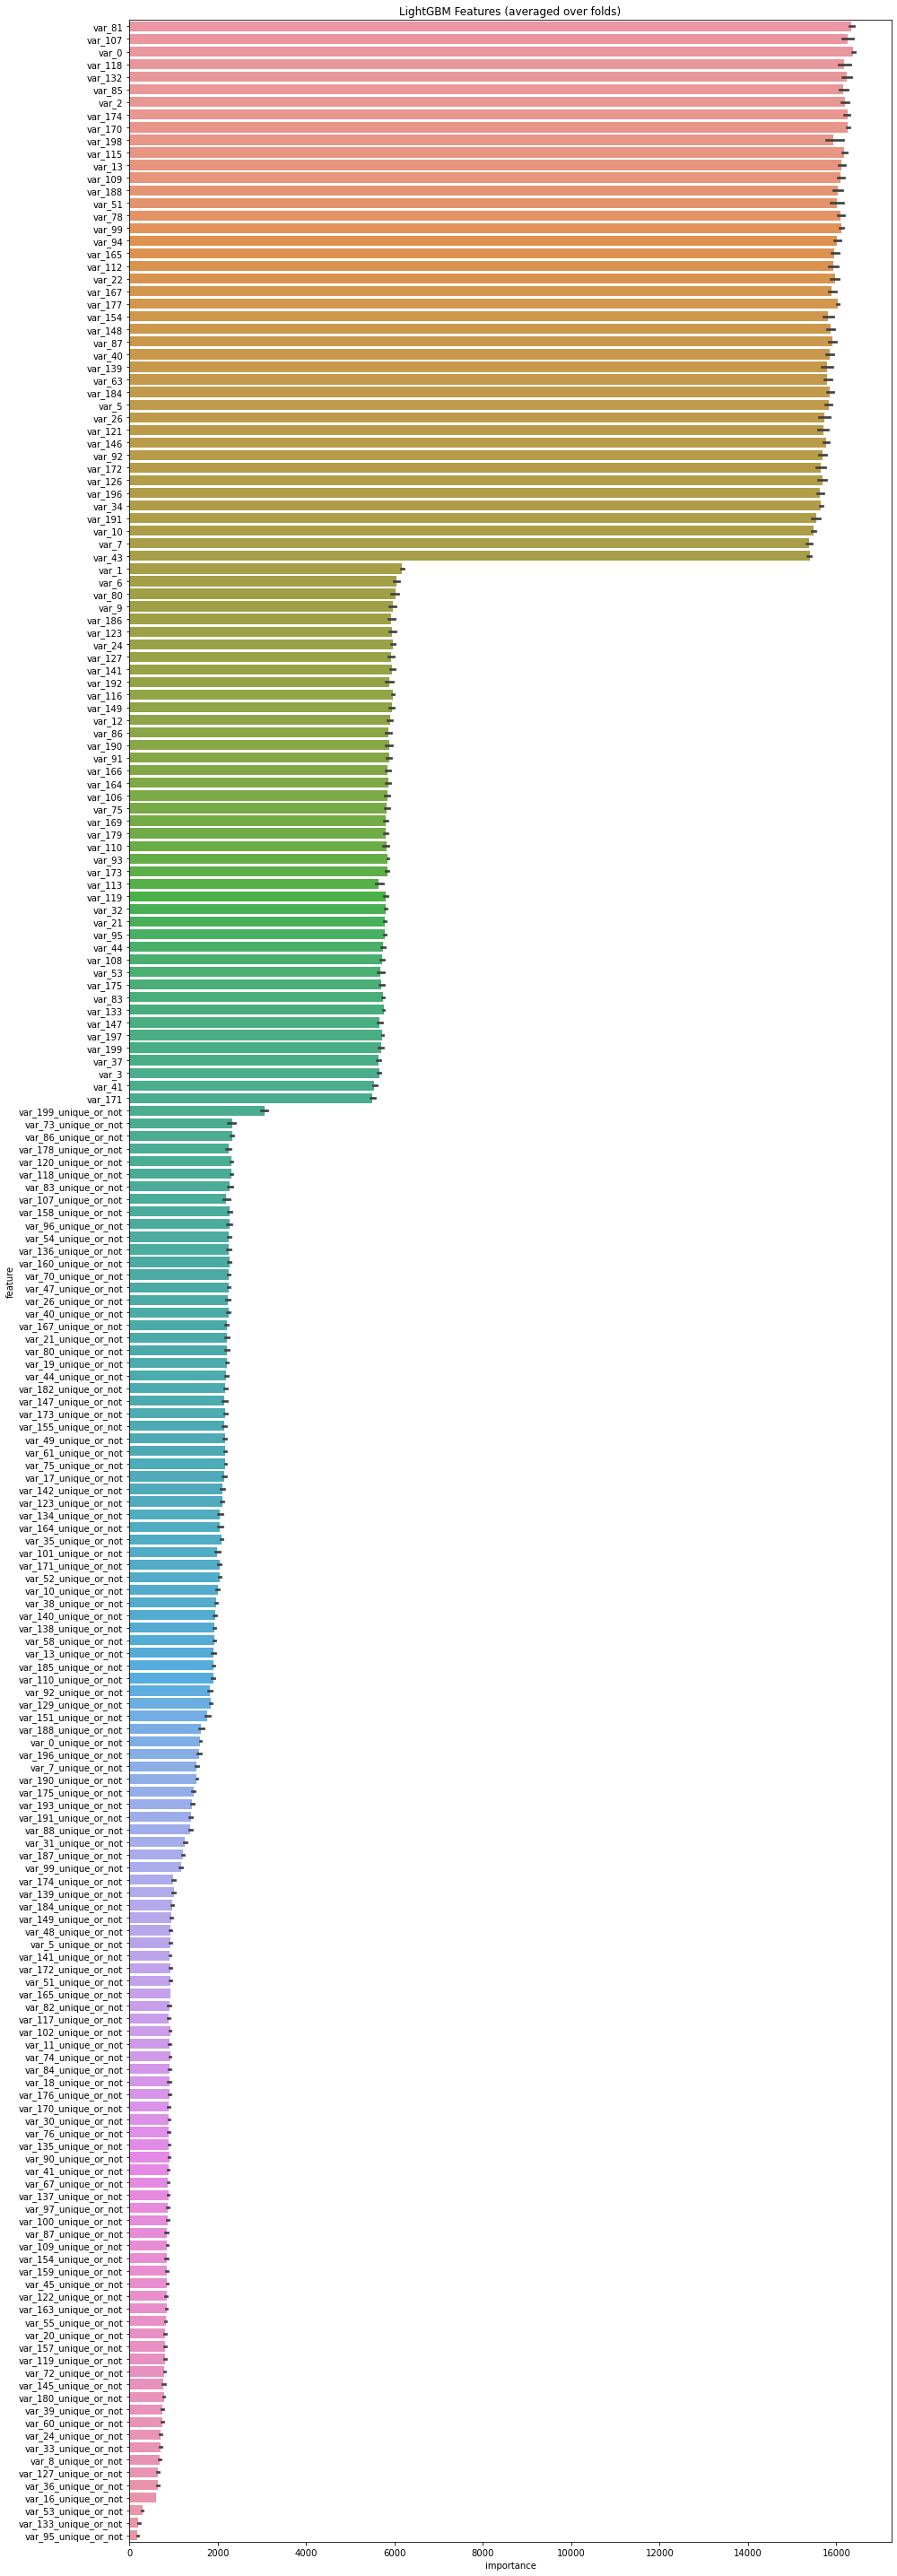

In [ ]:
# Display features by importances 

cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:2000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,40))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.show()

# Compare Different Models (2ith 200 magic features and fake data removed)

## Logistic Regression

In [13]:
df_train_with_magic_feature = df_train_with_magic.drop('target',1)
train_data, val_data, train_label, val_label = train_test_split(df_train_with_magic_feature, train_w_magic_label, test_size=0.3, random_state=23)   

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2',C=100,solver='liblinear',random_state=33)
LogisticRegressionModel.fit(train_data, train_label)

LogisticRegression(C=100, random_state=33, solver='liblinear')

In [ ]:
y_pred_lr = LogisticRegressionModel.predict(val_data)

In [ ]:
roc_results = roc_auc_score(val_label,y_pred_lr,average='weighted')
print("Logistic Regression AUC is: ", roc_results)

Logistic Regression AUC is:  0.6254956920106743


In [ ]:
real_df_test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
7,test_7,17.3035,-2.4212,13.3989,8.3998,11.0777,9.6449,5.9596,17.8477,-4.8068,...,4.4676,4.4214,0.9303,1.4994,15.2648,-1.7931,6.5316,10.4855,23.4631,0.7283
11,test_11,10.6137,-2.1898,8.9090,3.8014,13.8602,-5.9802,5.5515,15.4716,-0.1714,...,13.1683,4.0625,-0.1537,7.9787,18.4518,0.1000,-7.8212,9.2355,15.0721,-7.3475
15,test_15,14.8595,-4.5378,13.6483,5.6480,9.9144,1.5190,5.0358,13.4524,-2.5419,...,2.6735,5.8526,4.8517,2.5020,22.8224,-0.9325,8.6849,10.2848,17.4932,6.0800
16,test_16,14.1732,-5.1490,9.7591,3.7316,10.3700,-21.9202,7.7130,18.8749,0.4680,...,0.8640,5.9058,1.3140,4.8961,20.1087,1.1051,7.7184,9.3406,21.1746,-2.0098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,test_199986,19.2884,-2.8384,11.9149,6.6611,12.3112,12.9244,5.6492,16.0449,5.3597,...,-3.0704,3.9924,2.8872,3.3142,22.5225,0.9812,0.1020,8.3441,14.5823,0.7454
199993,test_199993,14.6764,-8.1066,7.1167,2.4138,10.3845,-11.9327,4.7563,16.0455,0.4510,...,5.0961,7.7472,2.8127,6.6012,15.3706,-0.4293,6.8485,10.4270,17.4970,-13.0074
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689


In [ ]:
# Build confusion matrix
cm=confusion_matrix(val_label,y_pred_lr)
cm1=pd.DataFrame(cm,index = ['0','1'],columns=['0','1'])
cm1.T

,0,1
0,53199,4427
1,775,1599


In [ ]:
print(metrics.classification_report(val_label,y_pred_lr,digits=3))

              precision    recall  f1-score   support

         0.0      0.923     0.986     0.953     53974
         1.0      0.674     0.265     0.381      6026

    accuracy                          0.913     60000
   macro avg      0.798     0.625     0.667     60000
weighted avg      0.898     0.913     0.896     60000



## Random Forest

In [21]:
rfc = RandomForestClassifier(n_estimators=500,max_depth=30)
rfc.fit(train_data, train_label)

RandomForestClassifier(max_depth=30, n_estimators=500)

In [22]:
y_pred_rf = rfc.predict(val_data)

In [23]:
roc_results = roc_auc_score(val_label,y_pred_rf,average='weighted')
roc_results

0.5

In [24]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(val_label,y_pred_rf)
cm1=pd.DataFrame(cm,index = ['0','1'],columns=['0','1'])
cm1.T

,0,1
0,53974,6026
1,0,0


In [26]:
print(metrics.classification_report(val_label,y_pred_rf,digits=3))

              precision    recall  f1-score   support

         0.0      0.900     1.000     0.947     53974
         1.0      0.000     0.000     0.000      6026

    accuracy                          0.900     60000
   macro avg      0.450     0.500     0.474     60000
weighted avg      0.809     0.900     0.852     60000



## KNN

In [14]:
from sklearn import neighbors

In [15]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data,train_label)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred_knn = knn.predict(val_data)

In [17]:
roc_results = roc_auc_score(val_label,y_pred_knn,average='weighted')
print("AUC of KNN is: ",roc_results)

AUC of KNN is:  0.5027201484369476


In [18]:
# Build confusion matrix
cm=confusion_matrix(val_label,y_pred_knn)
cm1=pd.DataFrame(cm,index = ['0','1'],columns=['0','1'])
cm1.T

,0,1
0,53569,5948
1,405,78


In [20]:
print(metrics.classification_report(val_label,y_pred_knn,digits=3))

              precision    recall  f1-score   support

         0.0      0.900     0.992     0.944     53974
         1.0      0.161     0.013     0.024      6026

    accuracy                          0.894     60000
   macro avg      0.531     0.503     0.484     60000
weighted avg      0.826     0.894     0.852     60000



### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective = 'binary',boosting = 'gbdt',max_depth = -1,num_leaves=12,learning_rate=0.01,
                     bagging_freq=5,bagging_fraction=0.4,feature_fraction=0.4,min_data_in_leaf=80,min_sum_heassian_in_leaf=10,
                     tree_learner='serial',metric='auc',boost_from_average='false',verbosity=1).fit(train_data,train_label)

In [ ]:
y_pred_light = lgbm.predict(test_data)

In [ ]:
roc_results = roc_auc_score(test_label,y_pred,average='weighted')
roc_results

In [ ]:
# Build confusion matrix
cm=confusion_matrix(test_label,y_pred)
cm1=pd.DataFrame(cm,index = ['0','1'],columns=['0','1'])
cm1.T

In [ ]:
print(metrics.classification_report(test_label,y_pred,digits=3))

## Submission based on best-performance model

In [ ]:
# Subreal testing performance 
real_sub_df = pd.DataFrame({'ID_code':real_df_test.ID_code.values })
real_sub_df['target'] = predictions
sub_real_fake_total = pd.DataFrame({"ID_code": df_test.ID_code.values})

In [ ]:
# Since we only use 100000 real data to make prediction and most of the data belongs to 0, here we just fill those prediction of fake data to 0
sub_final = sub_real_fake_total.set_index('ID_code').join(real_sub_df.set_index('ID_code')).reset_index()
sub_final.fillna(0,inplace=True)

In [ ]:
sub_final.to_csv("/Users/xuanyuzhang/Desktop/6420/Project/santander-customer-transaction-prediction/submission.csv", index=False)